# Practice 1

Student 1: <font color="blue">Alejandro González Álvarez</font>

NIA 1: <font color="blue">252658</font>

Student 2: <font color="blue">Luca Franceschi</font>

NIA 2: <font color="blue">253885</font>

Student 3: <font color="blue">Júlia Othats-Dalès</font>

NIA 3: <font color="blue">254435</font>

# Ex. 1

In [27]:
'''
Steps :
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.
'''

'\nSteps :\n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.\n'

## Sol. 1

Training dataset:

   Unnamed: 0         X         Y  C
0           0 -0.263997  1.006942  0
1           1  1.678440 -0.215066  1
2           2 -1.581623 -0.003148  0
3           3 -0.863377  0.751651  0
4           4  0.998721 -0.770067  1
Testing dataset:

   Unnamed: 0         X         Y  C
0           0  1.937660  0.624911  1
1           1 -1.004030 -0.097319  0
2           2  1.542199 -0.114397  0
3           3  0.625708 -0.685214  1
4           4  0.247116 -0.348297  1
Not normalized:



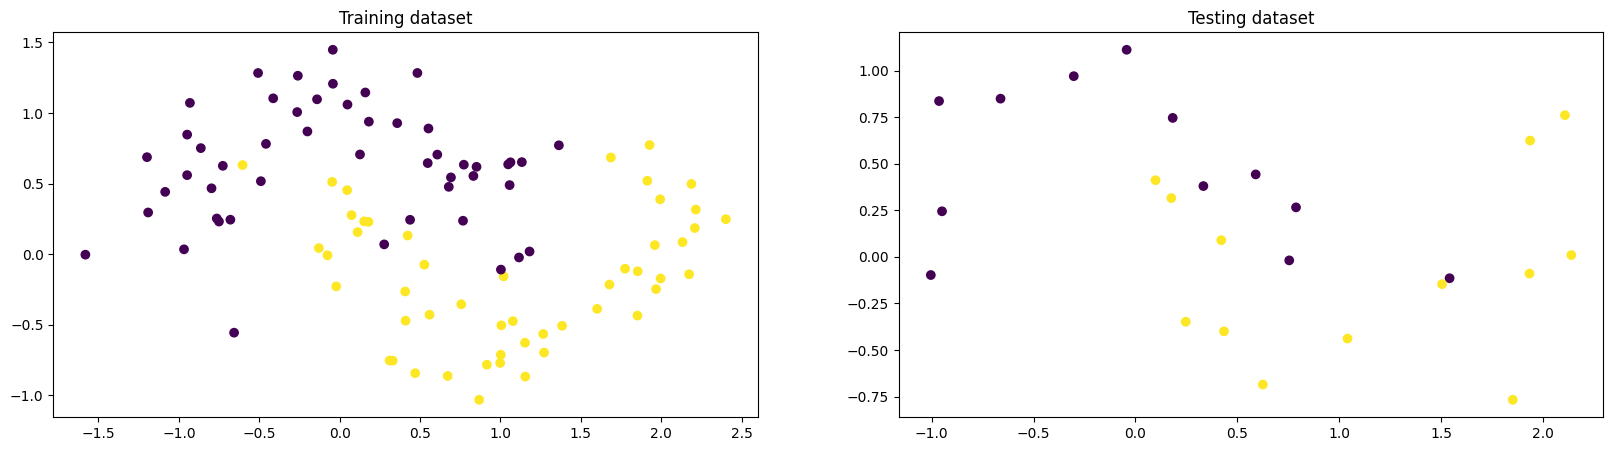


Normalized:



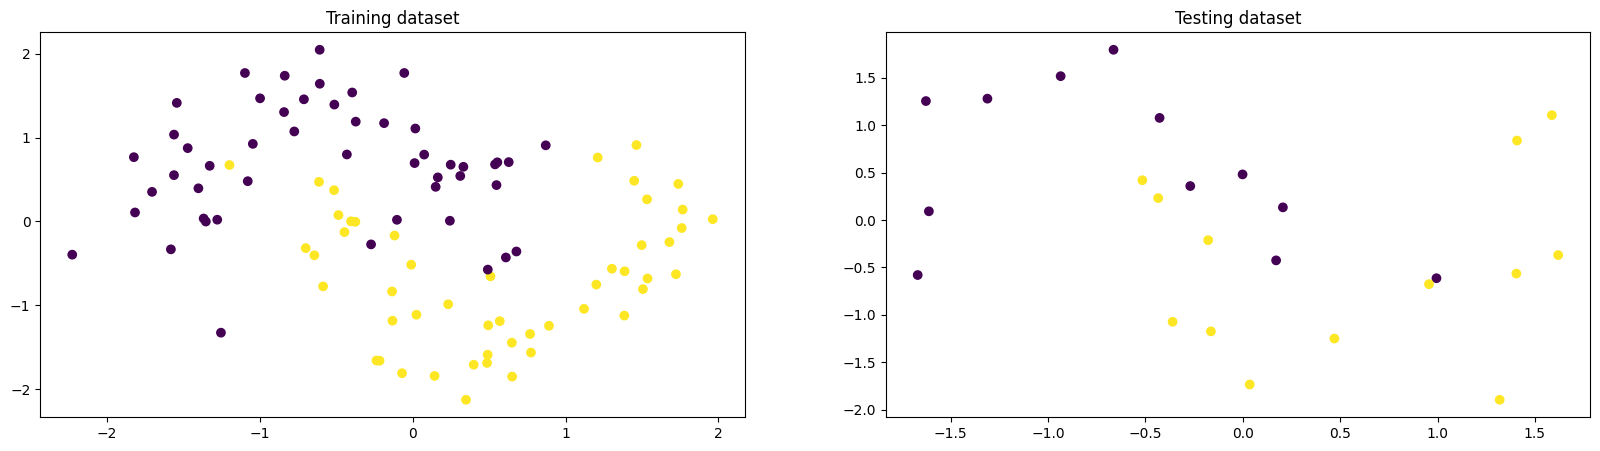

In [28]:
import pandas as pd # usage of Pandas to read and load data
import matplotlib.pyplot as plt # matplotlib for visualization
import numpy as np
from matplotlib.colors import ListedColormap

#1. Load train.csv and test.csv
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

# Show 5 first elements of the datasets
print("Training dataset:\n")
print(train_df.head(5))
print("Testing dataset:\n")
print(test_df.head(5))

#2. Visualize both training and testing data
print("Not normalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(train_df.X, train_df.Y, c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(test_df.X, test_df.Y, c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

# Normalize data (probar np column stack)
train_x = np.array(train_df[["X"]])
train_y = np.array(train_df[["Y"]].values)
test_x = np.array(test_df[["X"]].values)
test_y = np.array(test_df[["Y"]].values)

train_data = np.column_stack((train_x, train_y))
test_data = np.column_stack((test_x, test_y))

normalized_train = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
normalized_test = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# normalized_train = (train_df[["X", "Y"]] - np.mean(train_df[["X", "Y"]], axis = 0)) / np.std(train_df[["X", "Y"]], axis = 0)
# normalized_test = (test_df[["X", "Y"]] - np.mean(test_df[["X", "Y"]], axis = 0)) / np.std(test_df[["X", "Y"]], axis = 0)

print("\nNormalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(normalized_train[:,0], normalized_train[:,1], c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(normalized_test[:,0], normalized_test[:,1], c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

In [29]:
#3. Implementation of the MLP Class:
class MLP(object):
    def __init__(self,inputNode=2, hiddenNode=3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)    # sigmoid(z) * (1 - sigmoid(z))

    def loss(self, yHat, y):
        #Compute loss for given X, y, use weights already stored in class.
        J = np.mean(-y * np.log(yHat) - (1-y)*np.log(1-yHat))
        return J

    # Derivative of parameters
    def backward(self, X, yHat, y):
        self.yHat = yHat
        delta3 = (yHat - y)     # dL / dz3
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2
    
# Function to train a neural network (NN)
def train(NN:MLP, X, y, epoch = 10000, lr = .1):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X, yHat, y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

def predict(NN:MLP, X):
    return np.round(NN.forward(X))

def accuracy(y, yHat):
    error = 0
    for c1, c2 in zip(y, yHat):
        if c1 != c2:
            error += 1
    return 1 - (error/len(y))

Loss 0=0.7359006196027749
Loss 100=0.3337197653804014
Loss 200=0.32972716580083095
Loss 300=0.3259293954496289
Loss 400=0.32130668251356836
Loss 500=0.3150543232673337
Loss 600=0.306872129923135
Loss 700=0.29763861490064847
Loss 800=0.2896731089452902
Loss 900=0.28411033650573225
Loss 1000=0.287792200365821
Loss 1100=0.28367491814138607
Loss 1200=0.2819301994320023
Loss 1300=0.2808202459892167
Loss 1400=0.28001532371696053
Loss 1500=0.2793865011548743
Loss 1600=0.27887402575592724
Loss 1700=0.27845528458055174
Loss 1800=0.2781299132253696
Loss 1900=0.27790070319642707
Loss 2000=0.27775293563217357
Loss 2100=0.2776530361990016
Loss 2200=0.2775689006829636
Loss 2300=0.2774838177602093
Loss 2400=0.2773937983830922
Loss 2500=0.277300235853393
Loss 2600=0.277205372607645
Loss 2700=0.2771107726512199
Loss 2800=0.27701720761299137
Loss 2900=0.27692491357098364
Loss 3000=0.2768338310951519
Loss 3100=0.2767437551447137
Loss 3200=0.27665441488464365
Loss 3300=0.27656551306115756
Loss 3400=0.2764

Text(0, 0.5, 'Loss (J) value')

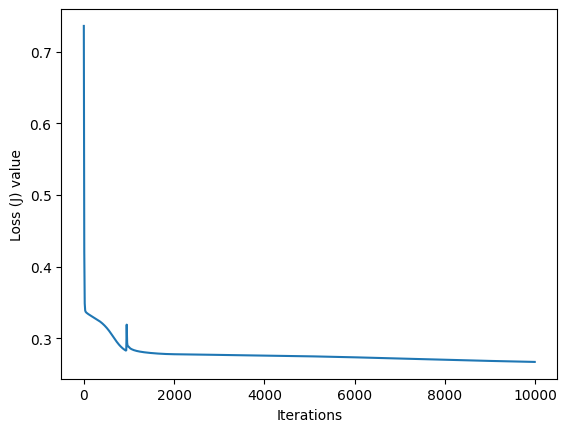

In [30]:
# Instantiate an MLP NN
mlp = MLP()

#4. Train the MLP, visualize decision boundary in 2D, and plot loss at each iteration
list_loss = train(mlp, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), epoch = 10000, lr = 0.04)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

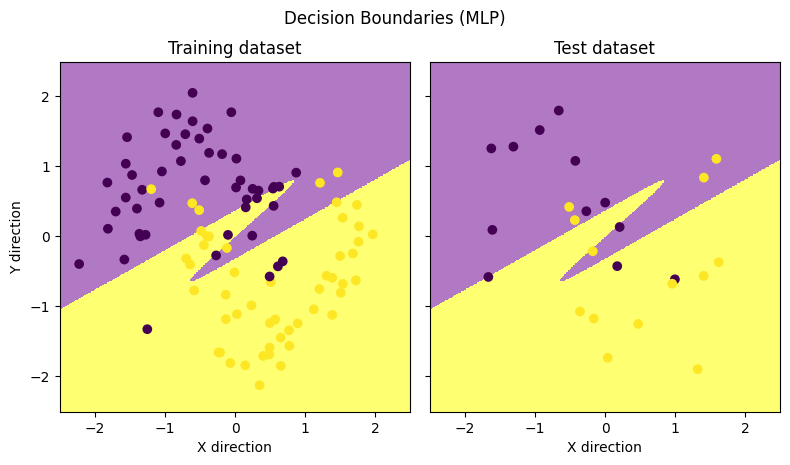

In [76]:
# Visualize the decision boundary in 2D of the classification
def visualize_boundaries(NN, range_x, range_y,
                         norm_train=None, norm_test=None, labels_train=None, labels_test=None,
                         cmap=ListedColormap(['#7E1E9C99', '#FFFF1499']),
                         title='MLP'):
    
    xx, yy = np.meshgrid(np.arange(range_x[0], range_x[1], 0.01), np.arange(range_y[0], range_y[1], 0.01))
    input = np.column_stack((xx.flatten(), yy.flatten()))
    pred = predict(NN, input)
    pred = pred.reshape(xx.shape)

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4.5))

    ax[0].set_box_aspect(1)
    ax[1].set_box_aspect(1)

    fig.suptitle('Decision Boundaries ({})'.format(title))
    ax[0].set_title('Training dataset')
    ax[1].set_title('Test dataset')
    ax[0].set_ylabel('Y direction')
    ax[0].set_xlabel('X direction')
    ax[1].set_xlabel('X direction')

    ax[0].pcolormesh(xx, yy, pred, cmap=cmap)
    ax[1].pcolormesh(xx, yy, pred, cmap=cmap)

    if norm_train.all() != None and norm_test.all() != None and labels_train.all() != None and labels_test.all() != None:
        ax[0].scatter(norm_train[:,0], norm_train[:,1], c=labels_train)
        ax[1].scatter(norm_test[:,0], norm_test[:,1], c=labels_test)

    plt.tight_layout()
    plt.show()
    # plt.contour([normalized_test[:, 0], normalized_test[:, 1]], )

visualize_boundaries(mlp, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_df.C, test_df.C,)

In [32]:
# 5. Apply on test dataset, and accuracy
test_yHat = predict(mlp, normalized_test)
train_yHat = predict(mlp, normalized_train)

train_accuracy = accuracy(train_df.C, train_yHat)
test_accuracy = accuracy(test_df.C, test_yHat)

print("Accuracy obtained in training dataset: %.2f" % (train_accuracy * 100) + " %.")
print("Accuracy obtained in test dataset: %.2f" % (test_accuracy * 100) + " %.")

Accuracy obtained in training dataset: 86.00 %.
Accuracy obtained in test dataset: 68.00 %.


# Ex. 2

In [33]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps :
  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.
  3. Train the MLP implmented in numpy with this new optimizer.
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.\nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps :\n  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.\n  3. Train the MLP implmented in numpy with this new optimizer.\n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

In [34]:
class OptimMom(object):
    def __init__(self,learning_rate = .001, gamma = 0.9):
        self.lr = learning_rate
        self.gamma = gamma
        self.last = 0
    # receive the parameters of the MLP and the computed gradients and update the latter
    def step(self,weight_list,gradient):
        uw = []
        for w,grd in zip(weight_list,gradient):
            VdW = (1-self.gamma)*self.last + self.gamma*grd
            uw.append(w - self.lr * VdW)
        return uw

In [35]:
# Same training procedure than befor but using the optimizer class
def train_woptimizer(NN,X, y, epoch = 5000, optim = None):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X,yHat,y)
        '''#now update the weight using gradient descent and the optimizer class
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr'''
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

Loss 0=1.0100341662032473
Loss 100=0.33423333708115543
Loss 200=0.3310123074769132
Loss 300=0.3281336121370842
Loss 400=0.3250480530557299
Loss 500=0.32087259318311245
Loss 600=0.3152670983460112
Loss 700=0.30806182890545586
Loss 800=0.29971206734064704
Loss 900=0.2919850008678466
Loss 1000=0.28610537521774726
Loss 1100=0.28264746251489664
Loss 1200=0.28500580758635746
Loss 1300=0.28244745283328343
Loss 1400=0.28110509615558177
Loss 1500=0.28022548862119695
Loss 1600=0.2795838887006413
Loss 1700=0.27908278258728747
Loss 1800=0.2786714704986652
Loss 1900=0.2783249006372274
Loss 2000=0.2780359631822451
Loss 2100=0.277809156404971
Loss 2200=0.27764988582394085
Loss 2300=0.2775513819083585
Loss 2400=0.27749143881231036
Loss 2500=0.27744510163183195
Loss 2600=0.27739733116218496
Loss 2700=0.27734352559640985
Loss 2800=0.2772844626317642
Loss 2900=0.27722231647991
Loss 3000=0.27715891132399906
Loss 3100=0.2770953512390957
Loss 3200=0.27703215944700604
Loss 3300=0.2769694967348987
Loss 3400=0

Text(0, 0.5, 'Loss (J) value')

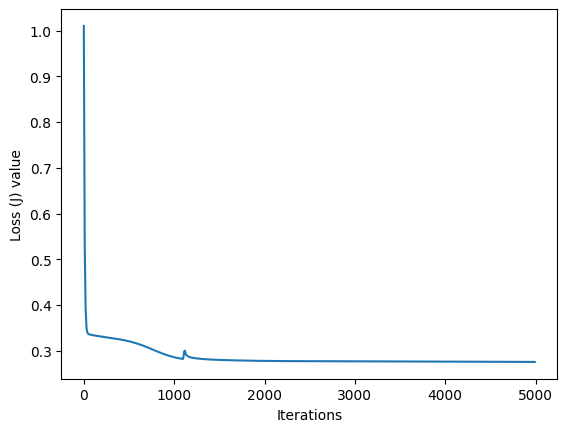

In [36]:
optim = OptimMom(learning_rate=0.04, gamma=0.9)
mlpMom = MLP()

list_loss = train_woptimizer(mlpMom, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), optim=optim)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

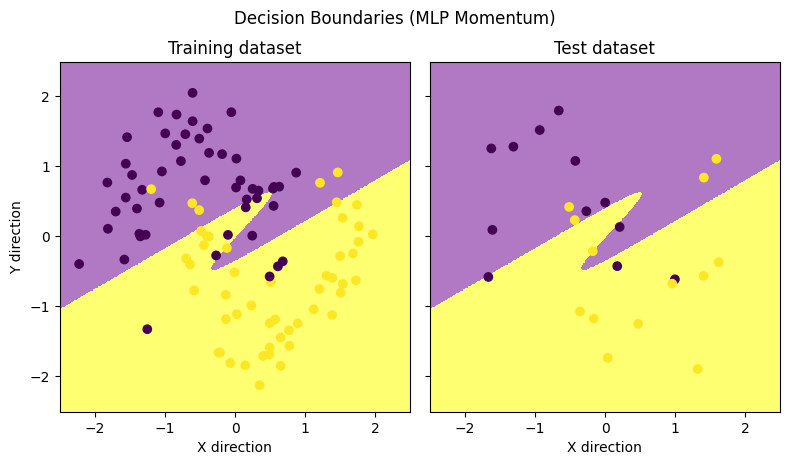

In [77]:
visualize_boundaries(mlpMom, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_df.C, test_df.C, title='MLP Momentum')

# Ex. 3

In [38]:
'''
Steps :
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps :\n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

## Sol. 3